In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Insurance Risk and Claims Dataset.csv to Insurance Risk and Claims Dataset.csv


In [ ]:
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

In [ ]:
insurance_claim = pd.read_csv("/content/Insurance Risk and Claims Dataset.csv")

In [ ]:
insurance_claim

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,POL000001,56.0,Female,Health,73968.80,1,0,3547.17,14048.25,Low
1,POL000002,69.0,Male,Health,128978.03,1,0,2306.97,3901.69,Low
2,POL000003,46.0,Female,Health,77282.87,3,0,926.91,1773.26,Medium
3,POL000004,32.0,Female,Life,65488.60,1,1,5095.42,28134.45,High
4,POL000005,60.0,Male,Health,59238.54,0,1,4688.19,15809.77,High
...,...,...,...,...,...,...,...,...,...,...
4995,POL004996,42.0,Female,Auto,36821.98,1,0,4920.15,12188.03,Low
4996,POL004997,39.0,Female,Auto,127943.25,4,0,4434.96,10490.84,High
4997,POL004998,114.0,Female,Property,44386.08,1,0,2581.25,3165.78,Low
4998,POL004999,34.0,Female,Health,100622.16,0,0,3641.36,1376.22,Low


In [ ]:
insurance_claim.isna().sum()

,0
Policy_ID,0
Customer_Age,162
Gender,243
Policy_Type,166
Annual_Income,164
Claim_History,0
Fraudulent_Claim,0
Premium_Amount,0
Claim_Amount,0
Risk_Score,0


# Handling missing data

In [ ]:
insurance_claim['Customer_Age'].fillna(insurance_claim['Customer_Age'].median(), inplace = True)
insurance_claim['Annual_Income'].fillna(insurance_claim['Annual_Income'].median(), inplace = True)

In [ ]:
insurance_claim['Gender'].fillna(insurance_claim['Gender'].mode()[0], inplace = True)
insurance_claim['Policy_Type'].fillna(insurance_claim['Policy_Type'].mode()[0], inplace = True)

In [ ]:
insurance_claim.isna().sum()

,0
Policy_ID,0
Customer_Age,0
Gender,0
Policy_Type,0
Annual_Income,0
Claim_History,0
Fraudulent_Claim,0
Premium_Amount,0
Claim_Amount,0
Risk_Score,0


In [ ]:
insurance_claim.describe()

,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.122000,75177.286018,1.545000,0.173200,3145.372972,9489.688154
std,20.550873,23457.933282,1.238984,0.378458,1521.411871,6438.395177
min,18.000000,30000.000000,0.000000,0.000000,502.000000,101.730000
25%,35.000000,59155.032500,1.000000,0.000000,1838.127500,4537.107500
50%,50.000000,74743.025000,1.000000,0.000000,3208.755000,8756.190000
75%,66.000000,90639.652500,2.000000,0.000000,4282.780000,12947.965000
max,127.000000,150000.000000,8.000000,1.000000,6996.740000,29942.790000


In [ ]:
insurance_claim['Policy_Type'].unique()

array(['Health', 'Life', 'Property', 'Auto'], dtype=object)

In [ ]:
insurance_claim['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
insurance_claim['Risk_Score'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

# EDA

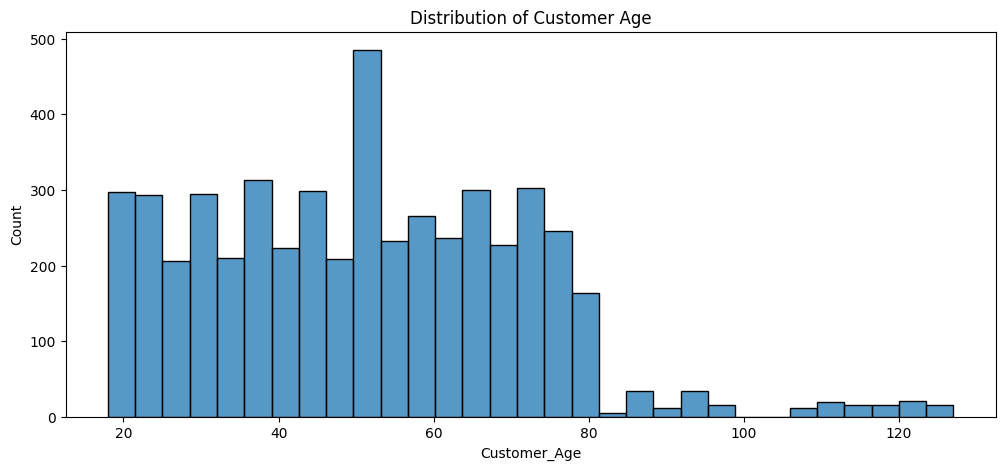

In [ ]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.histplot(insurance_claim['Customer_Age'])
plt.title('Distribution of Customer Age')
plt.show()

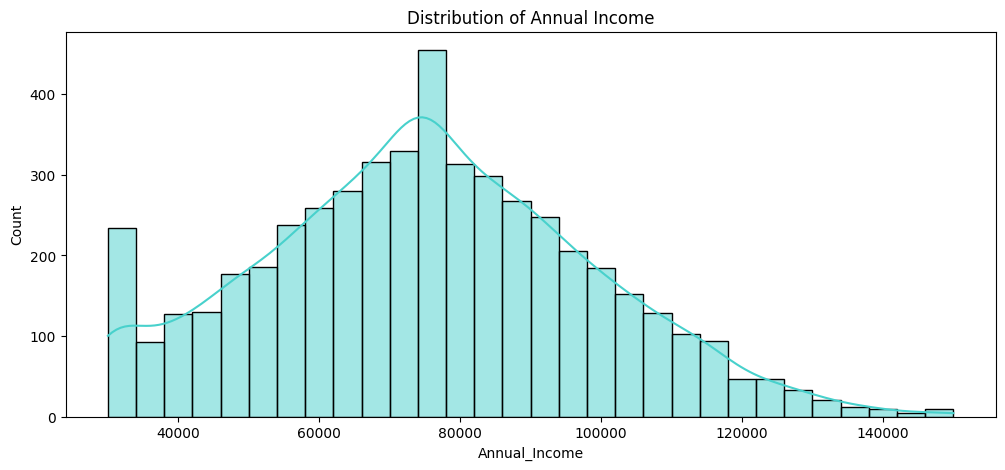

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(insurance_claim['Annual_Income'], bins=30, kde=True, color='mediumturquoise')
plt.title('Distribution of Annual Income')
plt.show()

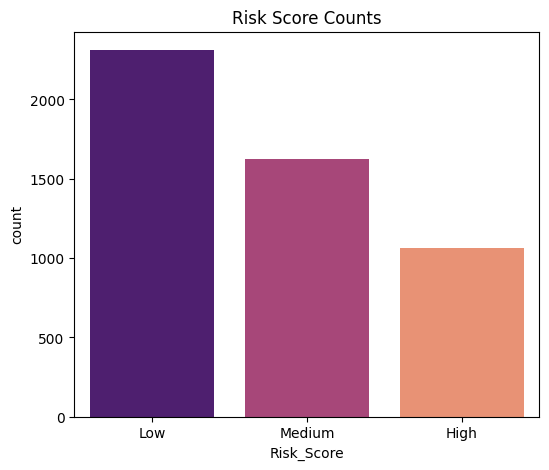

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.countplot(x='Risk_Score', data=insurance_claim, palette = 'magma')
plt.title('Risk Score Counts')
plt.show()


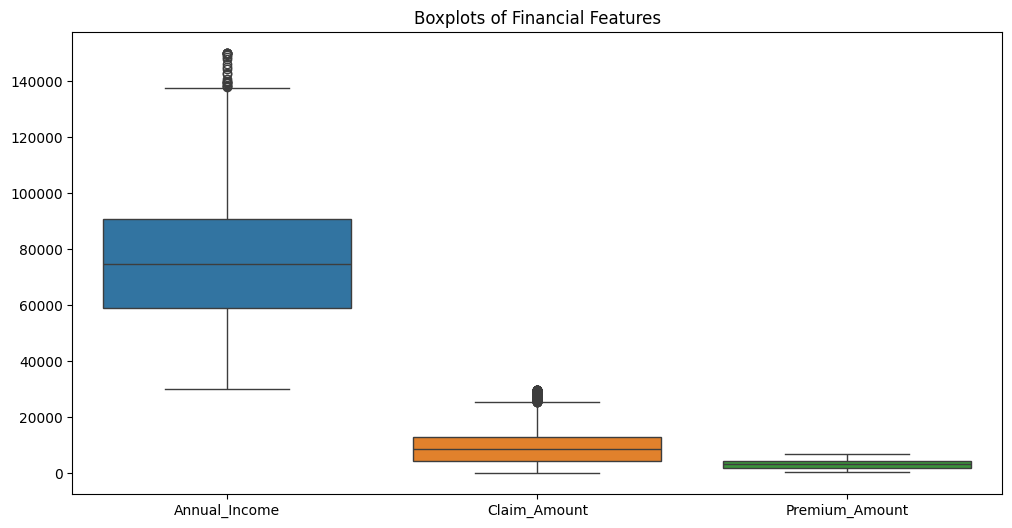

In [ ]:
# Boxplots for outliers
target_cols = ['Annual_Income', 'Claim_Amount', 'Premium_Amount']
plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_claim[target_cols])
plt.title("Boxplots of Financial Features")
plt.show()

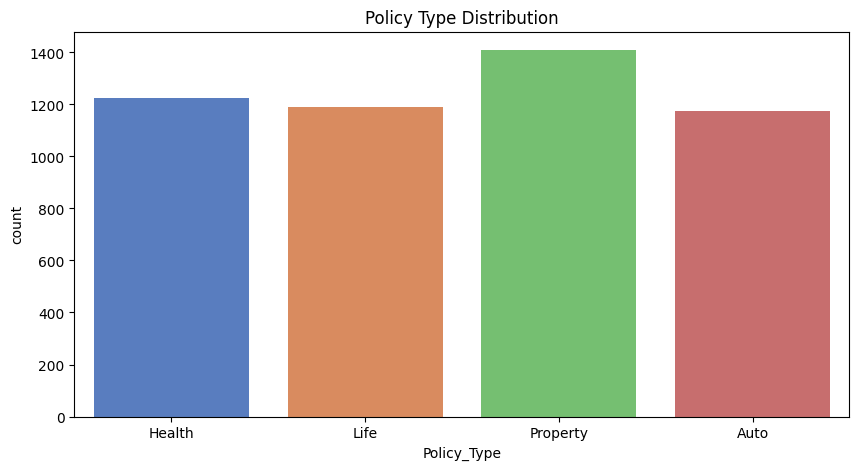

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=insurance_claim, x='Policy_Type', palette='muted')
plt.title('Policy Type Distribution')
plt.show()

# Encoding

In [ ]:
# One-Hot encoding for Gender,Policy type
insurance_claim = pd.get_dummies(insurance_claim, columns = ['Policy_Type', 'Gender'], dtype = int)
insurance_claim.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,POL000001,56.0,73968.80,1,0,3547.17,14048.25,Low,0,1,0,0,1,0,0
1,POL000002,69.0,128978.03,1,0,2306.97,3901.69,Low,0,1,0,0,0,1,0
2,POL000003,46.0,77282.87,3,0,926.91,1773.26,Medium,0,1,0,0,1,0,0
3,POL000004,32.0,65488.60,1,1,5095.42,28134.45,High,0,0,1,0,1,0,0
4,POL000005,60.0,59238.54,0,1,4688.19,15809.77,High,0,1,0,0,0,1,0


In [ ]:
# Encoding for risk score

risk_score_map = {'Low': 0, 'Medium': 1, 'High': 2}
insurance_claim['Risk_Score'] = insurance_claim['Risk_Score'].map(risk_score_map)
insurance_claim.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,POL000001,56.0,73968.80,1,0,3547.17,14048.25,0,0,1,0,0,1,0,0
1,POL000002,69.0,128978.03,1,0,2306.97,3901.69,0,0,1,0,0,0,1,0
2,POL000003,46.0,77282.87,3,0,926.91,1773.26,1,0,1,0,0,1,0,0
3,POL000004,32.0,65488.60,1,1,5095.42,28134.45,2,0,0,1,0,1,0,0
4,POL000005,60.0,59238.54,0,1,4688.19,15809.77,2,0,1,0,0,0,1,0


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
insurance_claim[['Annual_Income', 'Claim_Amount', 'Premium_Amount']] = scaler.fit_transform(insurance_claim[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])

insurance_claim.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,POL000001,56.0,0.366407,1,0,0.468867,0.467360,0,0,1,0,0,1,0,0
1,POL000002,69.0,0.824817,1,0,0.277913,0.127340,0,0,1,0,0,0,1,0
2,POL000003,46.0,0.394024,3,0,0.065424,0.056014,1,0,1,0,0,1,0,0
3,POL000004,32.0,0.295738,1,1,0.707252,0.939401,2,0,0,1,0,1,0,0
4,POL000005,60.0,0.243655,0,1,0.644551,0.526390,2,0,1,0,0,0,1,0


In [ ]:
import pickle

# Save the scaler using pickle
with open('risk_classification_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

# Download the saved scaler file
from google.colab import files
files.download('risk_classification_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Handling Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

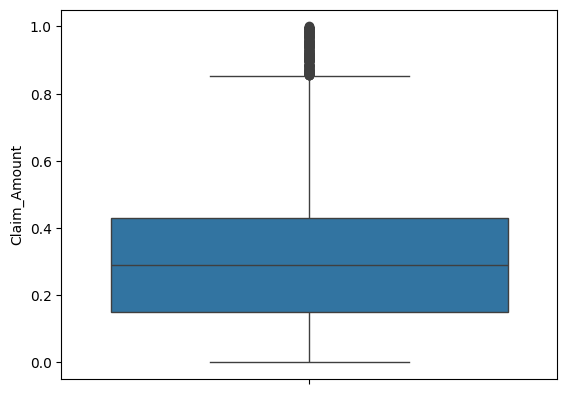

In [ ]:
sns.boxplot(insurance_claim['Claim_Amount'])
plt.show()

In [ ]:
# IQR Method

Q1 = insurance_claim['Claim_Amount'].quantile(0.25)
Q3 = insurance_claim['Claim_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


insurance_claim = insurance_claim[(insurance_claim['Claim_Amount'] >= lower_bound) & (insurance_claim['Claim_Amount'] <= upper_bound)]

insurance_claim

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other
0,POL000001,56.0,0.366407,1,0,0.468867,0.467360,0,0,1,0,0,1,0,0
1,POL000002,69.0,0.824817,1,0,0.277913,0.127340,0,0,1,0,0,0,1,0
2,POL000003,46.0,0.394024,3,0,0.065424,0.056014,1,0,1,0,0,1,0,0
4,POL000005,60.0,0.243655,0,1,0.644551,0.526390,2,0,1,0,0,0,1,0
5,POL000006,25.0,0.716059,1,0,0.433677,0.438773,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,POL004996,42.0,0.056850,1,0,0.680266,0.405022,0,1,0,0,0,1,0,0
4996,POL004997,39.0,0.816194,4,0,0.605561,0.348148,2,1,0,0,0,1,0,0
4997,POL004998,114.0,0.119884,1,0,0.320144,0.102679,0,0,0,0,1,1,0,0
4998,POL004999,34.0,0.588518,0,0,0.483370,0.042709,0,0,1,0,0,1,0,0


<Axes: ylabel='Claim_Amount'>

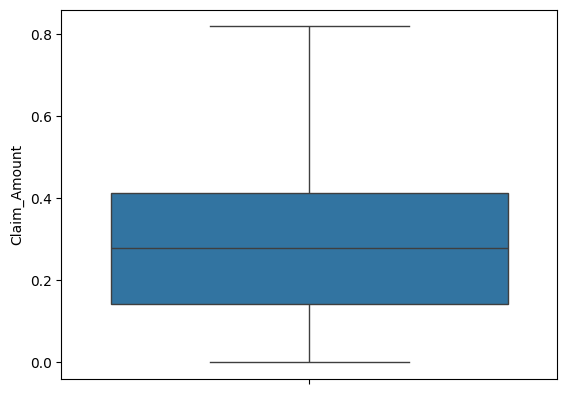

In [ ]:
sns.boxplot(insurance_claim['Claim_Amount'])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = insurance_claim.drop(['Policy_ID', 'Fraudulent_Claim', 'Risk_Score'], axis=1)
y = insurance_claim['Risk_Score']

In [ ]:
print("Class distribution:\n", y.value_counts())

Class distribution:
 Risk_Score
0    2311
1    1626
2     842
Name: count, dtype: int64


In [ ]:
# Handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Risk_Score,
0,2311
1,2311
2,2311


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 5546
Testing samples: 1387


In [ ]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 6]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100,200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 6]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'criterion': ['gini', 'entropy']
        }
    }
}


# Evaluate all models
results = {}
best_model = None
best_accuracy = 0

for name, config in models.items():
    print(f"\n=== Training {name} ===")

    # GridSearch with 5-fold cross validation
    clf = GridSearchCV(
        config['model'],
        config['params'],
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy',
        n_jobs=-1
    )
    clf.fit(X_train, y_train)

    # Best model from grid search
    best_estimator = clf.best_estimator_

    # Predictions
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': best_estimator,
        'accuracy': accuracy,
        'best_params': clf.best_params_,
        'report': classification_report(y_test, y_pred)
    }

    # Update best model if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

    print(f"Best params: {clf.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



=== Training Logistic Regression ===
Best params: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8731
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       462
           1       0.87      0.83      0.85       462
           2       0.80      0.84      0.82       463

    accuracy                           0.87      1387
   macro avg       0.87      0.87      0.87      1387
weighted avg       0.87      0.87      0.87      1387


=== Training Random Forest ===
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       462
           1       0.97      0.98      0.98       462
           2       0.98      0.94      0.96       463

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387


=== Training XG

In [ ]:
print(f"\nBest model: {best_model} with accuracy {best_accuracy:.4f}")


Best model: Random Forest with accuracy 0.9712


In [ ]:
import pickle

# Access the best model based on its name
best_model_instance = results[best_model]['model']

# Save the best model
filename = 'Randomforest_risk_classification.pkl'
pickle.dump(best_model_instance, open(filename, 'wb'))

print(f"Best model saved as {filename}")


Best model saved as Randomforest_risk_classification.pkl
